# Feature Engineering

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
path = "C:/Users/nadav.marciano/Desktop/BIU-DS12/project/df_clean_targ1.csv"
pd.set_option("display.max_columns", None)
df=pd.read_csv(path)
df.head()

,Date,Total_price,Order_count,max_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_relative_humidity,min_relative_humidity,max_dew_point,avg_dew_point,min_dew_point,max_wind_speed,avg_wind_speed,min_wind_speed,max_pressure_sea,avg_pressure_sea,min_pressure_sea,max_visibility,avg_visibility,min_visibility,precipitation,max_cloud_cover,avg_cloud_cover,min_cloud_cover,Products1,lamb tikka biryani,rogon,garlic rice,bombay aloo,bombay,korma prawn,onion bhaji,vegetable bhuna,chicken biryani,curry king prawn,diet coke 1.5 ltr,lamb tikka,keema aloo,lal mirch lamb,bombay lamb,cylon king prawn,paneer dansak,perrier water 75cl,aloo brinjal,chicken hari mirch,methi,paneer shaslick,crispy aloo,mango chutney,curry,garlic naan,Products2,korma,lamb tikka sizzler,tandoori fish karahi,king prawn biryani,madras king prawn,house white wine 75cl,cylon chicken tikka,plain rice,cylon chicken,aloo mithy,prawn balti,chicken shashlick,king prawn puree,bhuna chicken tikka,mushroom lamb,lamb chops (main),aloo chaat,madras prawn,pilau rice,dhansak lamb,vegetable balti,bhuna,lamb shaslick,methi prawn,prawn biryani,holiday,vegetable jalfrezi,methi king prawn,week,weekday,special fried rice,chicken shaslick,dupiaza king prawn,pathia prawn,bombay chicken,pathia,mushroom rice,egg paratha,brinjal bhajee,bottle coke,rogon chicken tikka,lamb biryani,paratha,kulcha naan,vegetable masala,keema naan,saag prawn,lamb balti,jeera chicken,chapati,curry prawn,dupiaza prawn,garlic tikka chilli masala,vegetable samosa,house red wine 75cl,saag bhajee,onion chutney,lamb rezala,malaya,grapes special,king prawn shaslick,tandoori roti,french fries,peshwari naan,malaya lamb,murgh masala,cylon lamb,dhansak,curry lamb,chicken roshni,bangon hari mirch,saag lamb,vindaloo chicken,garlic chicken,mix starter,chicken shashlick curry,bottle water 75cl,bhuna lamb,vindaloo prawn,royal paneer,dupiaza lamb,dhansak chicken tikka,saag,onion rice,vegetable korma,lamb chops,chicken tikka balti,saag aloo,lamb tikka balti,kurma sauce,bhuna king prawn,korma sauce,tandoori fish,chicken rezala,tandoori paratha,cauliflower bhajee,tandoori fish jalfrezi,saag king prawn,chicken chilli masala,chicken tikka biryani,tarka dall,jinga chillies,graps specil,achar lamb,rogon lamb,malaya prawn,lamb shashlick curry,king prawn jalfrezi,kurma,bhuna prawn,egg rice,cobra ( large ),king prawn karahi,rogon king prawn,keema rice,mushroom chicken tikka,vegetable dansak,madras chicken,cylon,dupiaza chicken tikka,mixed raita,vegetable rice,lamb sylhet,day_of_week,green salad,chicken tikka,paner pakora,mushroom,vegetable biryani,tandoori chicken,lamb tikka masala,cobra (330ml),tandoori chicken (main),lamb roshni,lamb tikka pasanda,persian chicken biryani,mixed starter,quarter,red sauce,mint sauce,sheek kebab,madras chicken tikka,mini bhaji,garlic mirch lamb,vegetable karahi,sheek kebab (main),lamb tikka jalfrezi,achar chicken,garlic mushroom,saag rice,vindaloo,chicken royal,vindaloo lamb,bombay prawn,curry sauce,tandoori chicken masala,madras,king prawn balti,mushroom chicken,dahi,day_of_month,king prawn butterfly,chicken tikka pasanda,paneer sizzler,garlic chicken rice,sheek kehab,methi chicken,bhindi bhajee,aloo peas,tandoori fish (main),persian lamb biryani,chicken tikka sizzler,chicken chilli suka,chicken tikka jalfrezi,naan,meat samosa,vindaloo king prawn,bombay chicken tikka,paneer karahi,chana masala,vegetable samba,lemon rice,dhansak chicken,chicken pakora,prawn puree,vindaloo sauce,korma lamb,cylon prawn,Products3,chicken karahi,chicken tikka (main),dhansak prawn,dupiaza,paneer tikka masala,pathia chicken tikka,curry chicken tikka,chicken tikka karahi,korma chicken,dhansak king prawn,rogon chicken,cobra (660ml),plain papadum,king prawn royal,butter chicken,methi lamb,muttar paneer,spicy papadum,lamb tikka karahi,curry chicken,chicken chaat (main),methi chicken tikka,paneer kurma,pathia king prawn,paneer pakora,chicken tikka masala,masala sauce,lime pickle,pathia lamb,lamb shashlick,coke 1.5 lt

In [3]:
df.shape

(1116, 313)

### Change the variables category to columns

In [5]:
def change_cat(var,df):
    for i in range(int(df[var].describe()[7])):
        df[var+'_'+str(i+1)] = df[[var]].apply(lambda x: (0, 1)[x[var]==(i+1)] , axis = 1)

In [6]:
change_cat('quarter',df)
change_cat('day_of_month',df)
change_cat('week',df)
change_cat('weekday',df)

<ipython-input-5-76194314269e>:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  df[var+'_'+str(i+1)] = df[[var]].apply(lambda x: (0, 1)[x[var]==(i+1)] , axis = 1)


### Subtraction variables

In [7]:
def subtraction(var,df):
    df['subtraction_'+var] = df['max_'+var]-df['min_'+var]

In [8]:
subtraction('temperature',df)
subtraction('relative_humidity',df)
subtraction('dew_point',df)
subtraction('wind_speed',df)
subtraction('pressure_sea',df)
subtraction('visibility',df)
subtraction('cloud_cover',df)

### Add new variables

In [9]:
df['good_day'] = df[['avg_temperature','precipitation','avg_visibility']].apply(lambda x: (0, 1)[x['precipitation']<5 and x['avg_temperature']>0 and x['avg_temperature']<19 and (x['avg_visibility']>2400 and x['avg_visibility']<24100)] , axis = 1)

<ipython-input-9-1bfaac4122cd>:1: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  df['good_day'] = df[['avg_temperature','precipitation','avg_visibility']].apply(lambda x: (0, 1)[x['precipitation']<5 and x['avg_temperature']>0 and x['avg_temperature']<19 and (x['avg_visibility']>2400 and x['avg_visibility']<24100)] , axis = 1)


In [10]:
df['day_off_temperature'] = df[['avg_temperature','weekday']].apply(lambda x: (0, 1)[(x['weekday']==1 or x['weekday']==7) and x['avg_temperature']>0 and x['avg_temperature']<19] , axis = 1)

<ipython-input-10-5b165064cb96>:1: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  df['day_off_temperature'] = df[['avg_temperature','weekday']].apply(lambda x: (0, 1)[(x['weekday']==1 or x['weekday']==7) and x['avg_temperature']>0 and x['avg_temperature']<19] , axis = 1)


In [11]:
df['day_off_precipitation'] = df[['precipitation','weekday']].apply(lambda x: (0, 1)[x['precipitation']<5 and (x['weekday']==1 or x['weekday']==7)] , axis = 1)

<ipython-input-11-e7f2ece20fc3>:1: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  df['day_off_precipitation'] = df[['precipitation','weekday']].apply(lambda x: (0, 1)[x['precipitation']<5 and (x['weekday']==1 or x['weekday']==7)] , axis = 1)


In [12]:
df['day_off_visibility'] = df[['avg_visibility','weekday']].apply(lambda x: (0, 1)[(x['weekday']==1 or x['weekday']==7) and (x['avg_visibility']>2400 and x['avg_visibility']<24100)] , axis = 1)

<ipython-input-12-f8ab8e64b737>:1: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  df['day_off_visibility'] = df[['avg_visibility','weekday']].apply(lambda x: (0, 1)[(x['weekday']==1 or x['weekday']==7) and (x['avg_visibility']>2400 and x['avg_visibility']<24100)] , axis = 1)


In [13]:
df['rate_week_quarter'] = df['week']/df['quarter']

# Feature Selection Strategy

In [14]:
df.shape

(1116, 420)

In [15]:
# without category and target variables
target_name = ['Products1']
categoryVariableList = ['Date','day_of_week']
target = df.loc[: ,target_name]
df = df.drop(target_name+categoryVariableList, axis = 1)
columns = df.columns

In [16]:
varSel = pd.DataFrame({'Variable': columns})
varSel.head()

,Variable
0,Total_price
1,Order_count
2,max_temperature
3,avg_temperature
4,min_temperature


## Univariable Analysis

In [17]:
rows = []
for col in columns:
        corr,pvalue = stats.spearmanr(target,df[col])
        rows.append([col,pvalue])
tab1 = pd.DataFrame(rows,columns=['Variables','p_value'])
tab1.head()

,Variables,p_value
0,Total_price,6.651970e-19
1,Order_count,2.974511e-20
2,max_temperature,9.973300e-01
3,avg_temperature,9.012335e-01
4,min_temperature,9.484659e-01


In [18]:
tab1[tab1['p_value']<0.05]

,Variables,p_value
0,Total_price,6.651970e-19
1,Order_count,2.974511e-20
17,max_visibility,1.855719e-02
24,lamb tikka biryani,6.691528e-03
25,rogon,1.237621e-03
...,...,...
403,weekday_6,1.330956e-09
404,weekday_7,3.310328e-08
413,day_off_temperature,5.366912e-14
414,day_off_precipitation,3.008818e-12


In [19]:
vn1 = tab1.loc[tab1['p_value']<0.05,'Variables'].unique()
print(len(vn1))
vn1

159


array(['Total_price', 'Order_count', 'max_visibility',
       'lamb tikka biryani', 'rogon', 'garlic rice', 'bombay aloo',
       'onion bhaji', 'chicken biryani', 'lamb tikka', 'keema aloo',
       'aloo brinjal', 'chicken hari mirch', 'methi', 'paneer shaslick',
       'crispy aloo', 'mango chutney', 'curry', 'garlic naan',
       'Products2', 'korma', 'lamb tikka sizzler', 'tandoori fish karahi',
       'king prawn biryani', 'plain rice', 'cylon   chicken',
       'aloo mithy', 'chicken shashlick', 'king prawn puree',
       'bhuna   chicken tikka', 'pilau rice', 'bhuna', 'week',
       'special fried rice', 'chicken shaslick', 'pathia',
       'mushroom rice', 'brinjal bhajee', 'lamb biryani', 'paratha',
       'kulcha naan', 'vegetable masala', 'keema naan', 'lamb balti',
       'chapati', 'garlic tikka chilli masala', 'vegetable samosa',
       'onion chutney', 'lamb rezala', 'tandoori roti', 'french fries',
       'peshwari naan', 'murgh masala', 'dhansak', 'curry   lamb',
     

We will add these variables to our variable selection table

In [20]:
varSel['Univarable'] = 0
varSel.loc[varSel['Variable'].isin(vn1), 'Univarable'] = 1
varSel

,Variable,Univarable
0,Total_price,1
1,Order_count,1
2,max_temperature,0
3,avg_temperature,0
4,min_temperature,0
...,...,...
412,good_day,0
413,day_off_temperature,1
414,day_off_precipitation,1
415,day_off_visibility,1


## Multivariable Analysis

In [21]:
X = df
X.head()

,Total_price,Order_count,max_temperature,avg_temperature,min_temperature,max_relative_humidity,avg_relative_humidity,min_relative_humidity,max_dew_point,avg_dew_point,min_dew_point,max_wind_speed,avg_wind_speed,min_wind_speed,max_pressure_sea,avg_pressure_sea,min_pressure_sea,max_visibility,avg_visibility,min_visibility,precipitation,max_cloud_cover,avg_cloud_cover,min_cloud_cover,lamb tikka biryani,rogon,garlic rice,bombay aloo,bombay,korma prawn,onion bhaji,vegetable bhuna,chicken biryani,curry king prawn,diet coke 1.5 ltr,lamb tikka,keema aloo,lal mirch lamb,bombay lamb,cylon king prawn,paneer dansak,perrier water 75cl,aloo brinjal,chicken hari mirch,methi,paneer shaslick,crispy aloo,mango chutney,curry,garlic naan,Products2,korma,lamb tikka sizzler,tandoori fish karahi,king prawn biryani,madras king prawn,house white wine 75cl,cylon chicken tikka,plain rice,cylon chicken,aloo mithy,prawn balti,chicken shashlick,king prawn puree,bhuna chicken tikka,mushroom lamb,lamb chops (main),aloo chaat,madras prawn,pilau rice,dhansak lamb,vegetable balti,bhuna,lamb shaslick,methi prawn,prawn biryani,holiday,vegetable jalfrezi,methi king prawn,week,weekday,special fried rice,chicken shaslick,dupiaza king prawn,pathia prawn,bombay chicken,pathia,mushroom rice,egg paratha,brinjal bhajee,bottle coke,rogon chicken tikka,lamb biryani,paratha,kulcha naan,vegetable masala,keema naan,saag prawn,lamb balti,jeera chicken,chapati,curry prawn,dupiaza prawn,garlic tikka chilli masala,vegetable samosa,house red wine 75cl,saag bhajee,onion chutney,lamb rezala,malaya,grapes special,king prawn shaslick,tandoori roti,french fries,peshwari naan,malaya lamb,murgh masala,cylon lamb,dhansak,curry lamb,chicken roshni,bangon hari mirch,saag lamb,vindaloo chicken,garlic chicken,mix starter,chicken shashlick curry,bottle water 75cl,bhuna lamb,vindaloo prawn,royal paneer,dupiaza lamb,dhansak chicken tikka,saag,onion rice,vegetable korma,lamb chops,chicken tikka balti,saag aloo,lamb tikka balti,kurma sauce,bhuna king prawn,korma sauce,tandoori fish,chicken rezala,tandoori paratha,cauliflower bhajee,tandoori fish jalfrezi,saag king prawn,chicken chilli masala,chicken tikka biryani,tarka dall,jinga chillies,graps specil,achar lamb,rogon lamb,malaya prawn,lamb shashlick curry,king prawn jalfrezi,kurma,bhuna prawn,egg rice,cobra ( large ),king prawn karahi,rogon king prawn,keema rice,mushroom chicken tikka,vegetable dansak,madras chicken,cylon,dupiaza chicken tikka,mixed raita,vegetable rice,lamb sylhet,green salad,chicken tikka,paner pakora,mushroom,vegetable biryani,tandoori chicken,lamb tikka masala,cobra (330ml),tandoori chicken (main),lamb roshni,lamb tikka pasanda,persian chicken biryani,mixed starter,quarter,red sauce,mint sauce,sheek kebab,madras chicken tikka,mini bhaji,garlic mirch lamb,vegetable karahi,sheek kebab (main),lamb tikka jalfrezi,achar chicken,garlic mushroom,saag rice,vindaloo,chicken royal,vindaloo lamb,bombay prawn,curry sauce,tandoori chicken masala,madras,king prawn balti,mushroom chicken,dahi,day_of_month,king prawn butterfly,chicken tikka pasanda,paneer sizzler,garlic chicken rice,sheek kehab,methi chicken,bhindi bhajee,aloo peas,tandoori fish (main),persian lamb biryani,chicken tikka sizzler,chicken chilli suka,chicken tikka jalfrezi,naan,meat samosa,vindaloo king prawn,bombay chicken tikka,paneer karahi,chana masala,vegetable samba,lemon rice,dhansak chicken,chicken pakora,prawn puree,vindaloo sauce,korma lamb,cylon prawn,Products3,chicken karahi,chicken tikka (main),dhansak prawn,dupiaza,paneer tikka masala,pathia chicken tikka,curry chicken tikka,chicken tikka karahi,korma chicken,dhansak king prawn,rogon chicken,cobra (660ml),plain papadum,king prawn royal,butter chicken,methi lamb,muttar paneer,spicy papadum,lamb tikka karahi,curry chicken,chicken chaat (main),methi chicken tikka,paneer kurma,pathia king prawn,paneer pakora,chicken tikka masala,masala sauce,lime pickle,pathia lamb,lamb shashlick,coke 1.5 ltr,malaya chicken tikka,lamb

In [22]:
y = target
print([X.shape,y.shape])

[(1116, 417), (1116, 1)]


### Variable Selection using LASSO (L1 penalization)

In [23]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

lassomod = Lasso().fit(X, y)

In [24]:
model = SelectFromModel(lassomod, prefit=True)
model.get_support()
varSel['Lasso'] = model.get_support().astype('int64')

### Variable Selection using Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

lromod = LogisticRegression().fit(X, y)

C:\Users\nadav.marciano\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nadav.marciano\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
model = SelectFromModel(lromod, prefit=True)
model.get_support()
varSel['LogisticRegression'] = model.get_support().astype('int64')

### Variable Selection using Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rfmod = RandomForestClassifier().fit(X, y)

<ipython-input-27-41d4b3eec1f3>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmod = RandomForestClassifier().fit(X, y)


In [28]:
model = SelectFromModel(rfmod, prefit=True)
model.get_support()
varSel['RandomForest'] = model.get_support().astype('int64')

### Variable Selection using Gradient Boosting classification

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

gbmod = GradientBoostingClassifier().fit(X, y)

C:\Users\nadav.marciano\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [30]:
model = SelectFromModel(gbmod, prefit=True)
model.get_support()
varSel['GradientBoost'] = model.get_support().astype('int64')

### Variable Selection using SVM classification

In [31]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

svmmod = LinearSVC(C=0.01, penalty="l1",dual=False).fit(X, y)

C:\Users\nadav.marciano\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nadav.marciano\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [32]:
model = SelectFromModel(svmmod, prefit=True)
model.get_support()
varSel['SVM'] = model.get_support().astype('int64')

### Summarization and Selection of Variables 

In [33]:
varSel['Sum'] =  np.sum(varSel,axis=1)
varSel

,Variable,Univarable,Lasso,LogisticRegression,RandomForest,GradientBoost,SVM,Sum
0,Total_price,1,1,1,1,1,1,6
1,Order_count,1,0,1,1,1,1,5
2,max_temperature,0,0,0,1,1,1,3
3,avg_temperature,0,0,1,1,0,0,2
4,min_temperature,0,0,1,1,1,0,3
...,...,...,...,...,...,...,...,...
412,good_day,0,0,0,0,0,0,0
413,day_off_temperature,1,0,1,1,1,0,4
414,day_off_precipitation,1,0,1,1,0,0,3
415,day_off_visibility,1,0,1,1,0,0,3


In [34]:
varSel.groupby('Sum')['Variable'].count()

Sum
0    204
1     83
2     51
3     42
4     26
5     10
6      1
Name: Variable, dtype: int64

In [35]:
varSel[varSel['Sum']==5]

,Variable,Univarable,Lasso,LogisticRegression,RandomForest,GradientBoost,SVM,Sum
1,Order_count,1,0,1,1,1,1,5
50,Products2,1,0,1,1,1,1,5
58,plain rice,1,0,1,1,1,1,5
79,week,1,0,1,1,1,1,5
96,keema naan,1,0,1,1,1,1,5
206,madras,1,0,1,1,1,1,5
224,naan,1,0,1,1,1,1,5
251,plain papadum,1,0,1,1,1,1,5
306,aloo gobi,1,0,1,1,1,1,5
399,weekday_2,1,0,1,1,1,1,5


In [36]:
varSel[varSel['Sum']>=3]

,Variable,Univarable,Lasso,LogisticRegression,RandomForest,GradientBoost,SVM,Sum
0,Total_price,1,1,1,1,1,1,6
1,Order_count,1,0,1,1,1,1,5
2,max_temperature,0,0,0,1,1,1,3
4,min_temperature,0,0,1,1,1,0,3
5,max_relative_humidity,0,0,1,1,1,1,4
...,...,...,...,...,...,...,...,...
408,subtraction_wind_speed,0,0,1,1,1,1,4
411,subtraction_cloud_cover,0,0,1,1,0,1,3
413,day_off_temperature,1,0,1,1,1,0,4
414,day_off_precipitation,1,0,1,1,0,0,3


In [37]:
len(varSel[varSel['Sum']>=3])

79

In [38]:
variables = list(varSel[varSel['Sum']>=3]['Variable'])

In [39]:
df_ml = df.loc[: ,variables]
df_ml.head()

,Total_price,Order_count,max_temperature,min_temperature,max_relative_humidity,avg_relative_humidity,max_dew_point,max_wind_speed,avg_wind_speed,min_wind_speed,max_pressure_sea,avg_pressure_sea,min_pressure_sea,avg_visibility,precipitation,max_cloud_cover,bombay aloo,onion bhaji,methi,crispy aloo,mango chutney,curry,garlic naan,Products2,korma,tandoori fish karahi,plain rice,pilau rice,bhuna,week,weekday,keema naan,chapati,vegetable samosa,grapes special,dhansak,mix starter,saag aloo,cauliflower bhajee,chicken tikka biryani,madras chicken,vegetable rice,chicken tikka,tandoori chicken,red sauce,mint sauce,mini bhaji,madras,day_of_month,sheek kehab,bhindi bhajee,naan,prawn puree,chicken tikka (main),plain papadum,butter chicken,spicy papadum,chicken tikka masala,lime pickle,lamb karahi,tandoori mixed grill,vegetable curry,puree,saag paneer,aloo gobi,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,subtraction_temperature,subtraction_relative_humidity,subtraction_dew_point,subtraction_wind_speed,subtraction_cloud_cover,day_off_temperature,day_off_precipitation,day_off_visibility
0,645.95,17,29.0,18.3,93,73.0,20.0,23,13.5,4.0,101.65,101.53,101.40,18500,0.0,8.0,4,0,3,0,4,5,1,1,0,1,1,16,1,21,6,2,8,0,0,0,0,0,0,0,0,2,0,3,3,2,2,4,27,1,0,5,1,1,21,1,0,5,1,0,0,3,1,2,1,0,0,0,0,0,1,10.7,40,4.9,19.0,5.0,0,0,0
1,1085.10,30,30.4,16.7,89,69.5,20.5,22,13.0,4.0,101.92,101.79,101.66,20100,0.0,8.0,5,4,2,2,9,3,5,1,0,0,6,18,0,21,7,6,7,1,0,0,0,3,0,2,0,1,2,2,0,3,3,6,28,0,2,18,0,1,28,3,0,11,0,0,1,1,1,0,2,0,0,0,0,0,0,13.7,39,5.5,18.0,5.0,0,1,1
2,729.40,21,27.6,16.8,91,75.5,19.5,28,16.5,5.0,101.86,101.64,101.43,18500,1.0,8.0,3,1,0,1,5,0,7,0,0,0,1,14,2,22,1,5,4,2,0,1,0,2,1,2,0,0,1,0,2,6,4,4,29,1,1,12,0,1,24,0,3,7,1,0,3,0,1,0,3,1,0,0,0,0,0,10.8,31,4.4,23.0,4.0,0,1,1
3,647.95,18,25.5,15.2,94,71.5,16.8,20,12.0,4.0,101.61,101.49,101.38,24100,0.0,7.0,5,2,0,3,5,2,9,1,0,0,1,12,1,22,2,2,2,0,0,0,0,2,1,0,0,1,0,1,2,6,4,4,30,1,0,6,3,1,26,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,10.3,45,3.3,16.0,6.0,0,0,0
4,473.45,13,25.5,12.7,94,67.0,14.1,21,11.5,2.0,101.86,101.68,101.50,24100,0.0,7.0,4,3,0,0,1,1,4,0,0,0,5,9,0,22,3,1,0,0,0,2,0,3,1,2,0,0,0,0,0,1,3,2,31,1,0,5,0,0,9,1,0,6,1,1,0,2,0,0,0,0,0,1,0,0,0,12.8,54,5.1,19.0,7.0,0,0,0


In [40]:
df_ml.to_csv('df_ml_targ1.csv')

In [41]:
path = "C:/Users/nadav.marciano/Desktop/BIU-DS12/project/df_ml_targ1.csv"
pd.set_option("display.max_columns", None)
df_ml=pd.read_csv(path)
df_ml.head()

,Unnamed: 0,Total_price,Order_count,max_temperature,min_temperature,max_relative_humidity,avg_relative_humidity,max_dew_point,max_wind_speed,avg_wind_speed,min_wind_speed,max_pressure_sea,avg_pressure_sea,min_pressure_sea,avg_visibility,precipitation,max_cloud_cover,bombay aloo,onion bhaji,methi,crispy aloo,mango chutney,curry,garlic naan,Products2,korma,tandoori fish karahi,plain rice,pilau rice,bhuna,week,weekday,keema naan,chapati,vegetable samosa,grapes special,dhansak,mix starter,saag aloo,cauliflower bhajee,chicken tikka biryani,madras chicken,vegetable rice,chicken tikka,tandoori chicken,red sauce,mint sauce,mini bhaji,madras,day_of_month,sheek kehab,bhindi bhajee,naan,prawn puree,chicken tikka (main),plain papadum,butter chicken,spicy papadum,chicken tikka masala,lime pickle,lamb karahi,tandoori mixed grill,vegetable curry,puree,saag paneer,aloo gobi,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,subtraction_temperature,subtraction_relative_humidity,subtraction_dew_point,subtraction_wind_speed,subtraction_cloud_cover,day_off_temperature,day_off_precipitation,day_off_visibility
0,0,645.95,17,29.0,18.3,93,73.0,20.0,23,13.5,4.0,101.65,101.53,101.40,18500,0.0,8.0,4,0,3,0,4,5,1,1,0,1,1,16,1,21,6,2,8,0,0,0,0,0,0,0,0,2,0,3,3,2,2,4,27,1,0,5,1,1,21,1,0,5,1,0,0,3,1,2,1,0,0,0,0,0,1,10.7,40,4.9,19.0,5.0,0,0,0
1,1,1085.10,30,30.4,16.7,89,69.5,20.5,22,13.0,4.0,101.92,101.79,101.66,20100,0.0,8.0,5,4,2,2,9,3,5,1,0,0,6,18,0,21,7,6,7,1,0,0,0,3,0,2,0,1,2,2,0,3,3,6,28,0,2,18,0,1,28,3,0,11,0,0,1,1,1,0,2,0,0,0,0,0,0,13.7,39,5.5,18.0,5.0,0,1,1
2,2,729.40,21,27.6,16.8,91,75.5,19.5,28,16.5,5.0,101.86,101.64,101.43,18500,1.0,8.0,3,1,0,1,5,0,7,0,0,0,1,14,2,22,1,5,4,2,0,1,0,2,1,2,0,0,1,0,2,6,4,4,29,1,1,12,0,1,24,0,3,7,1,0,3,0,1,0,3,1,0,0,0,0,0,10.8,31,4.4,23.0,4.0,0,1,1
3,3,647.95,18,25.5,15.2,94,71.5,16.8,20,12.0,4.0,101.61,101.49,101.38,24100,0.0,7.0,5,2,0,3,5,2,9,1,0,0,1,12,1,22,2,2,2,0,0,0,0,2,1,0,0,1,0,1,2,6,4,4,30,1,0,6,3,1,26,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,10.3,45,3.3,16.0,6.0,0,0,0
4,4,473.45,13,25.5,12.7,94,67.0,14.1,21,11.5,2.0,101.86,101.68,101.50,24100,0.0,7.0,4,3,0,0,1,1,4,0,0,0,5,9,0,22,3,1,0,0,0,2,0,3,1,2,0,0,0,0,0,1,3,2,31,1,0,5,0,0,9,1,0,6,1,1,0,2,0,0,0,0,0,1,0,0,0,12.8,54,5.1,19.0,7.0,0,0,0


## Test, Train and Dev dataset

Selection of the randomness coefficient

0


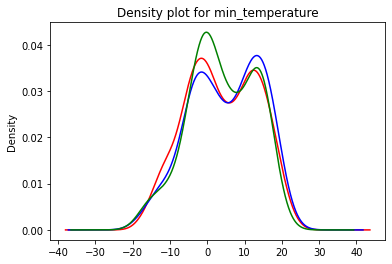

1


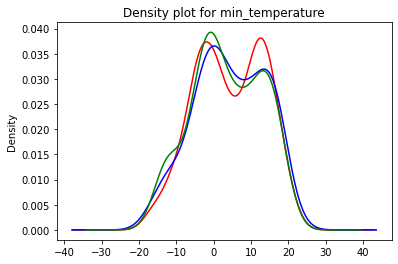

2


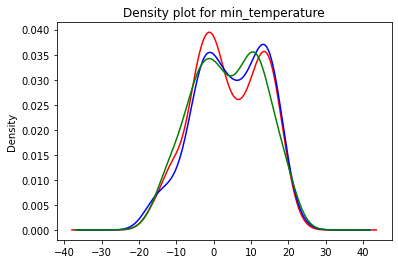

3


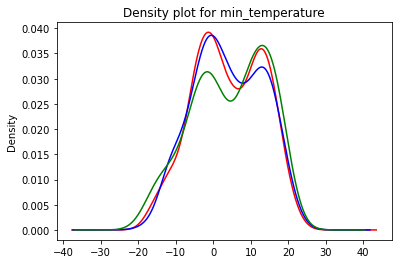

4


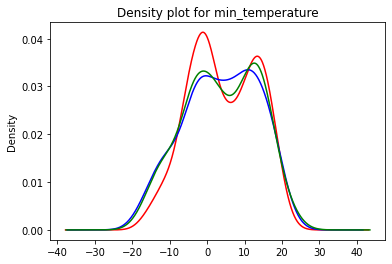

5


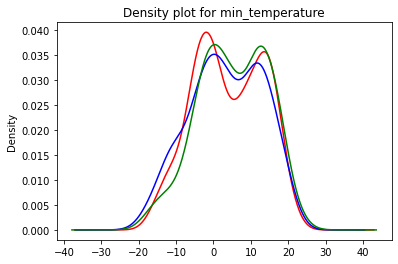

6


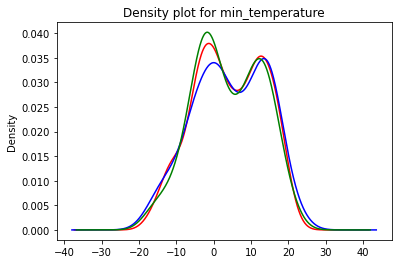

7


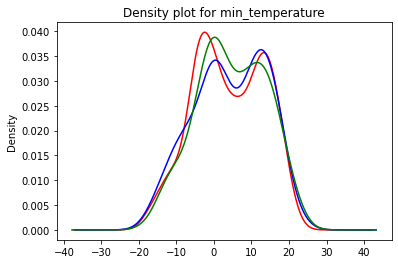

8


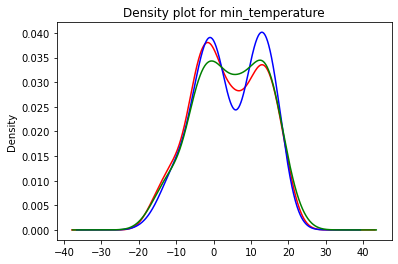

9


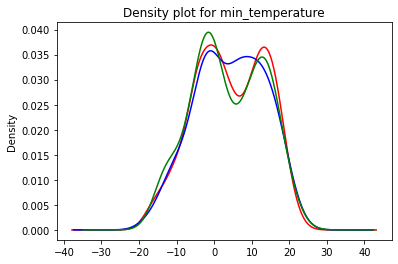

10


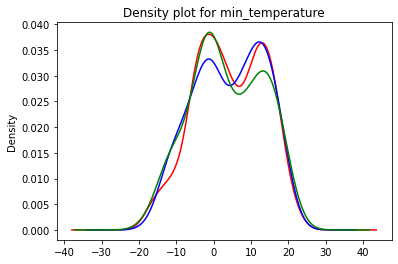

11


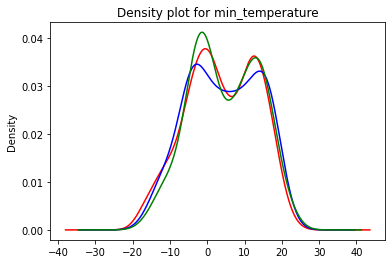

12


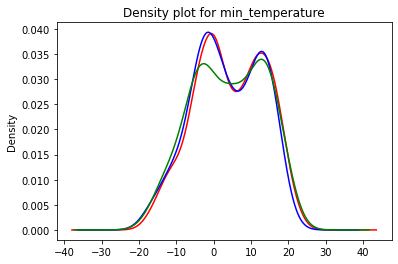

13


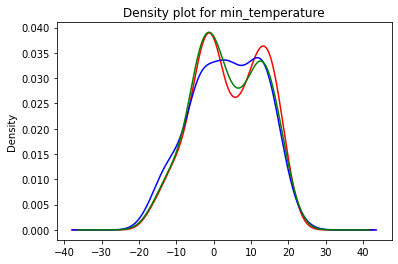

14


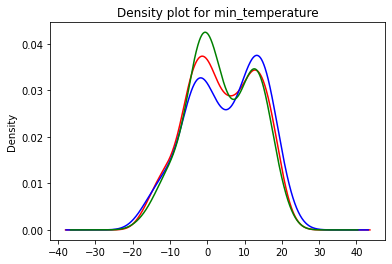

15


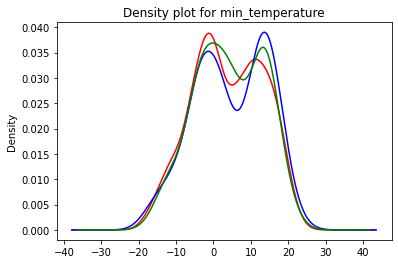

16


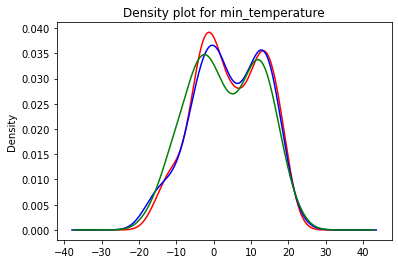

17


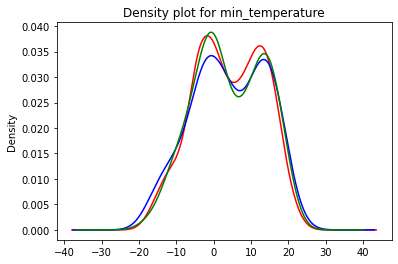

18


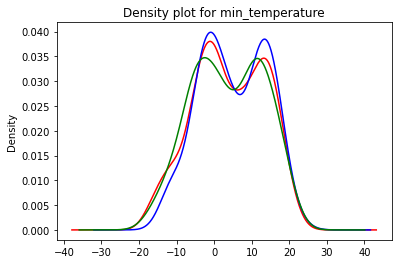

19


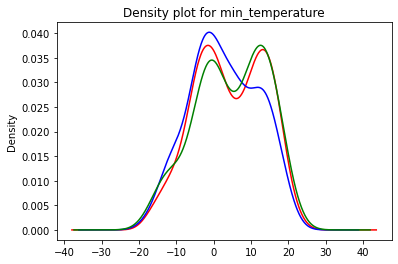

20


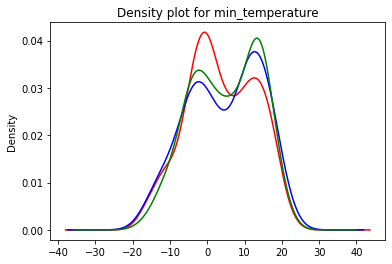

21


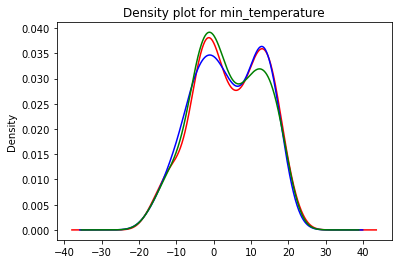

22


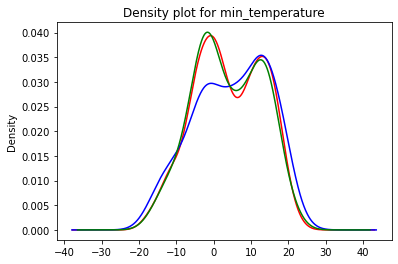

23


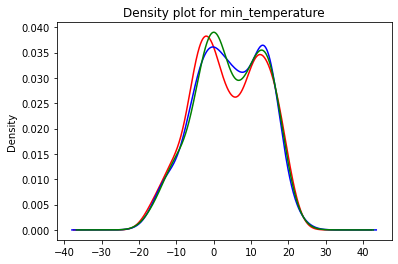

24


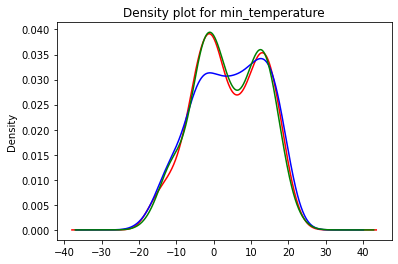

25


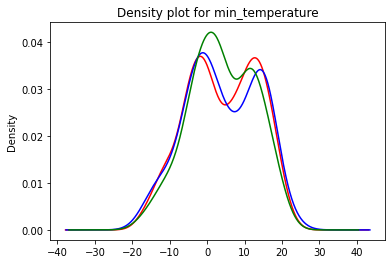

26


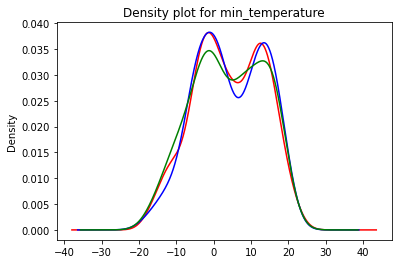

27


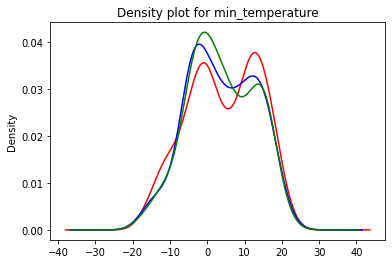

28


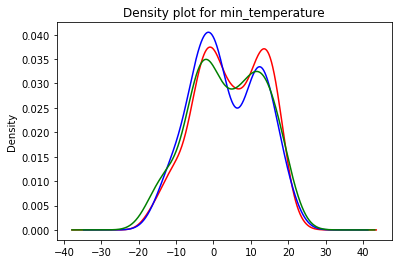

29


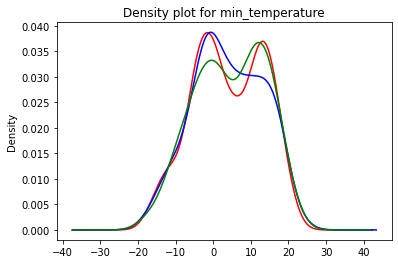

30


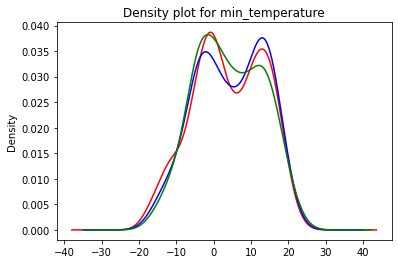

31


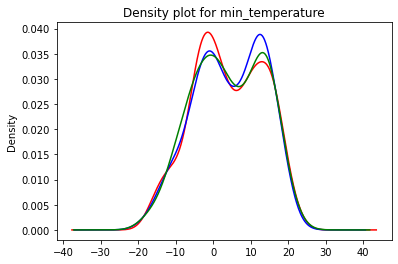

32


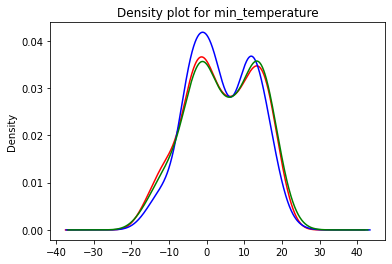

33


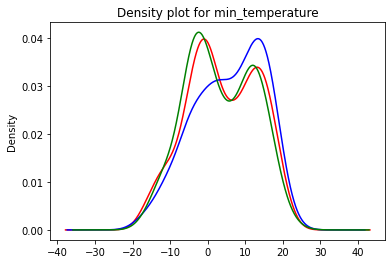

34


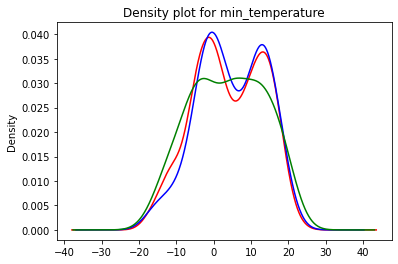

35


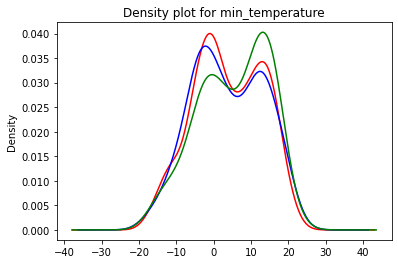

36


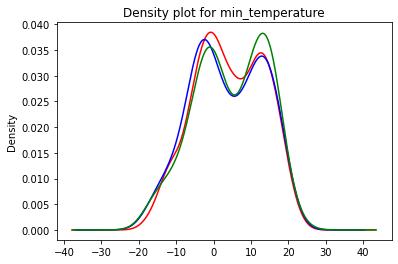

37


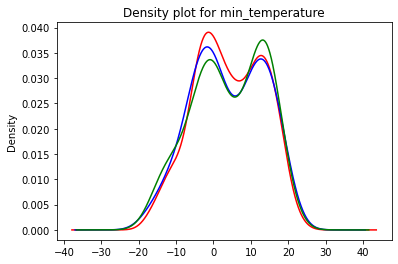

38


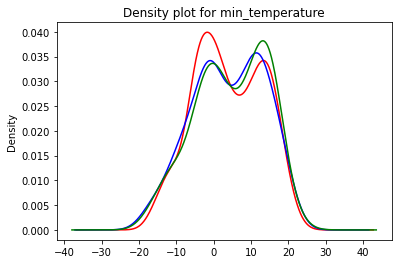

39


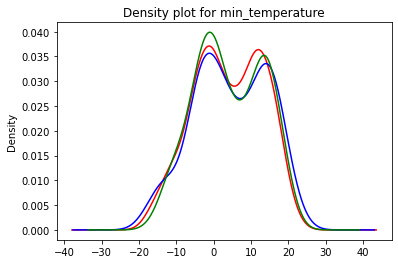

40


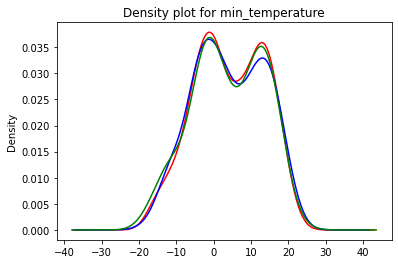

41


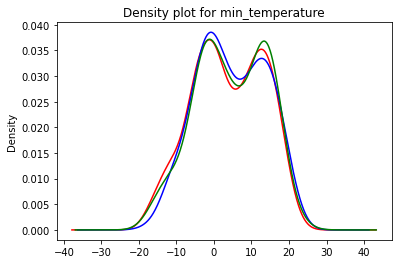

42


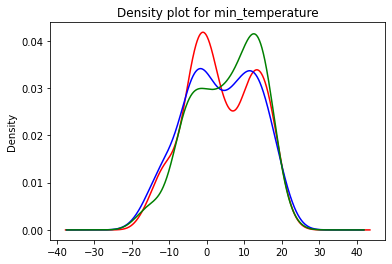

43


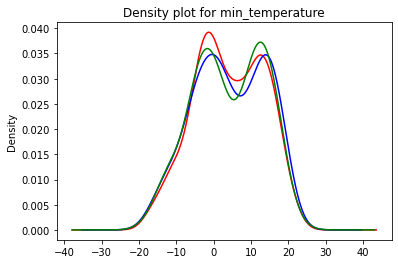

44


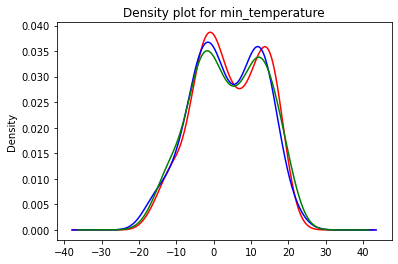

45


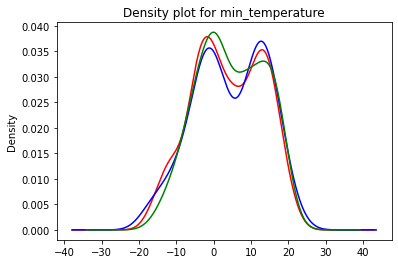

46


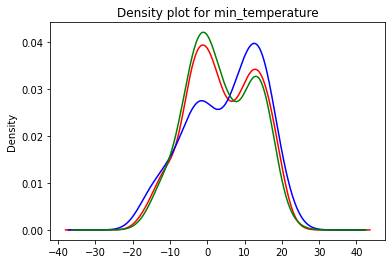

47


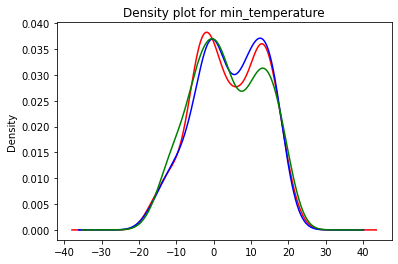

48


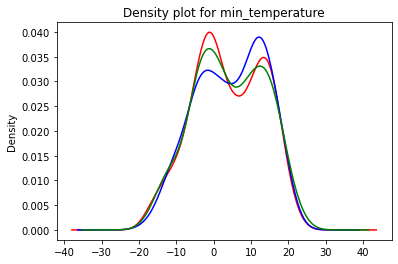

49


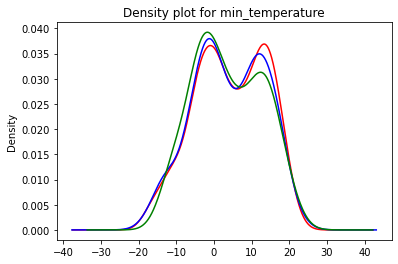

50


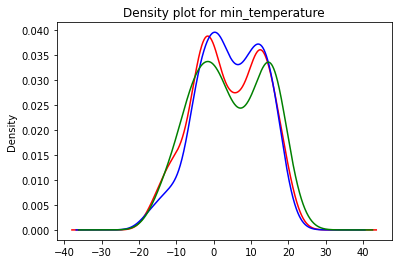

51


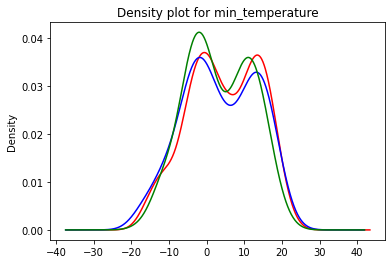

52


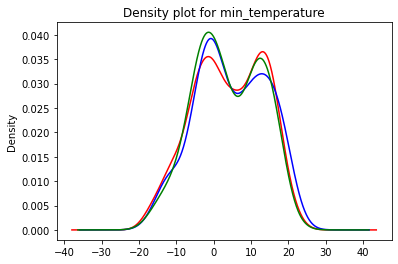

53


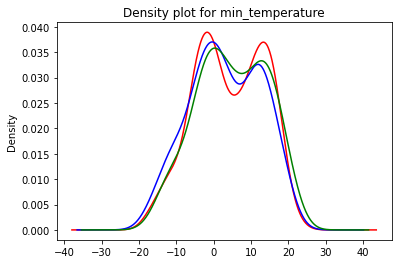

54


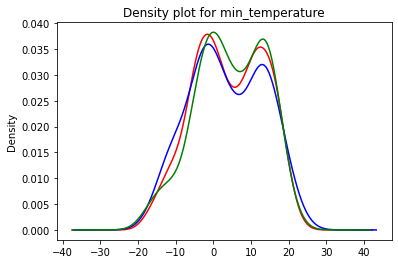

55


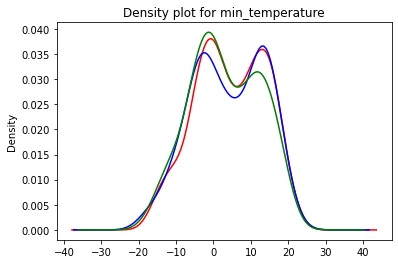

56


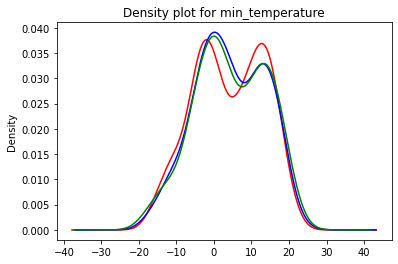

57


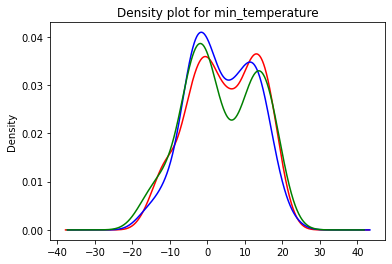

58


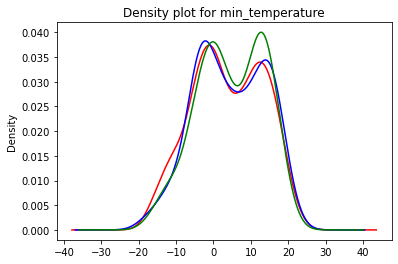

59


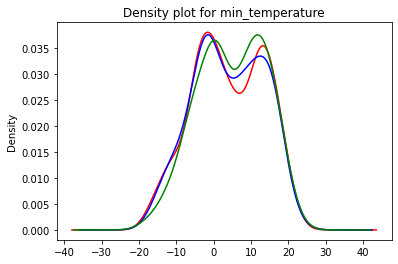

60


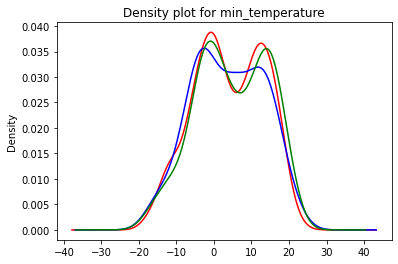

61


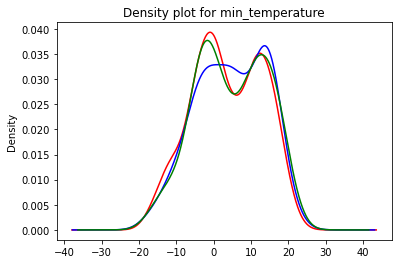

62


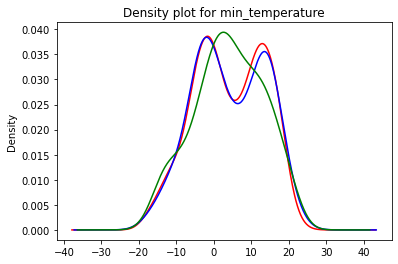

63


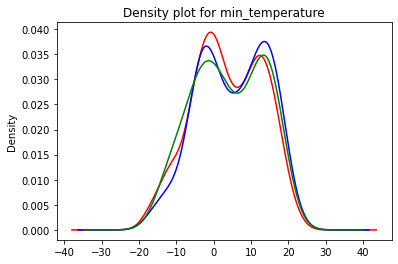

64


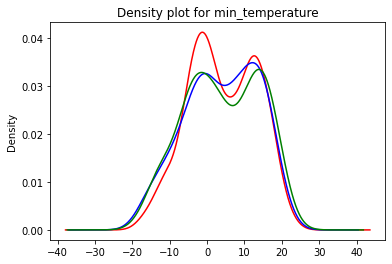

65


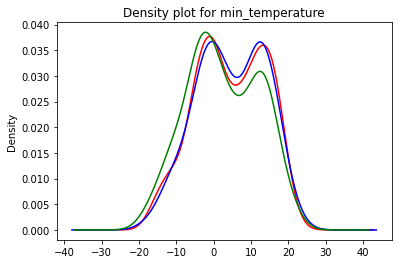

66


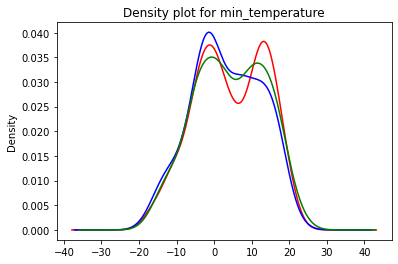

67


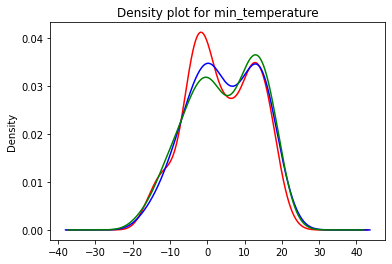

68


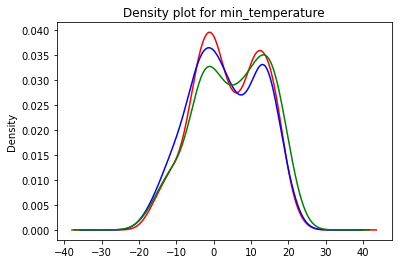

69


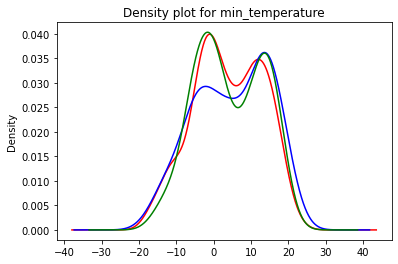

70


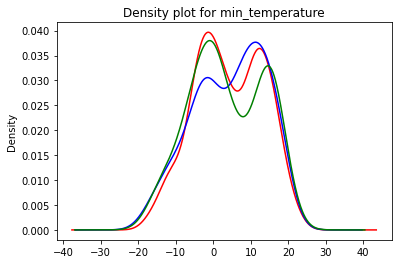

71


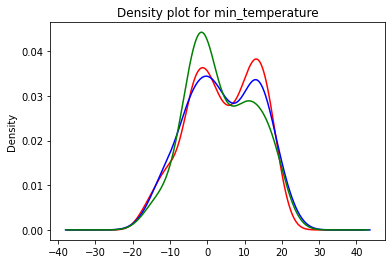

72


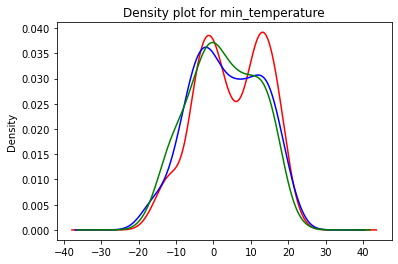

73


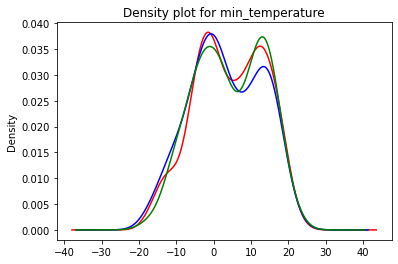

74


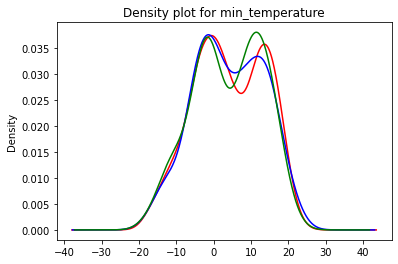

75


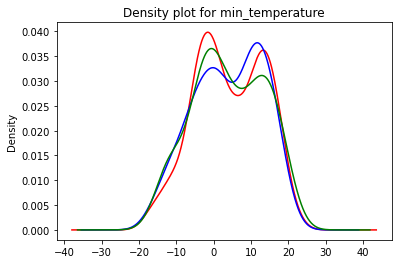

76


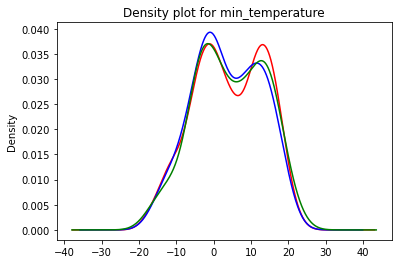

77


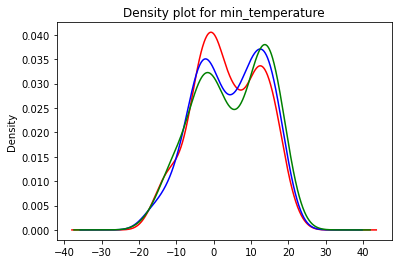

78


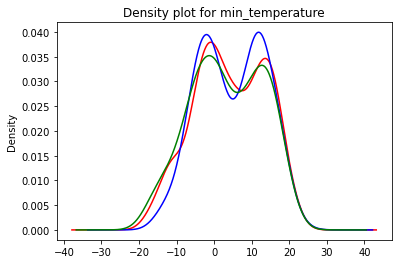

79


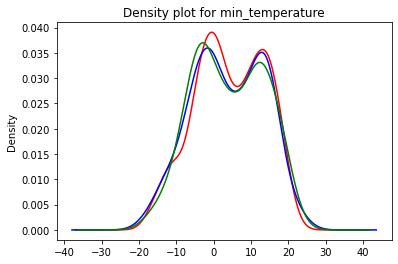

80


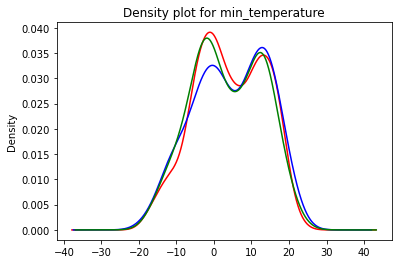

81


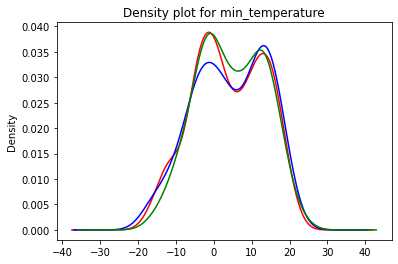

82


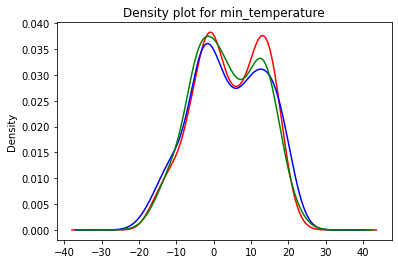

83


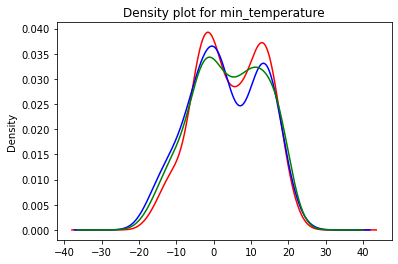

84


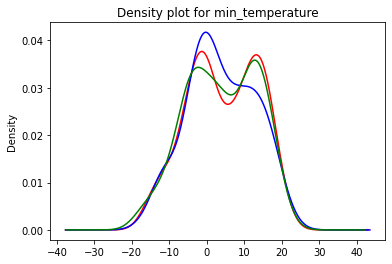

85


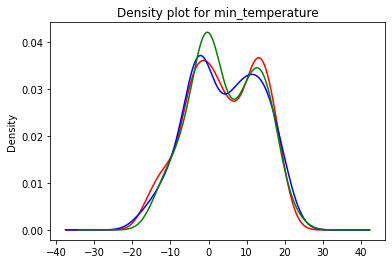

86


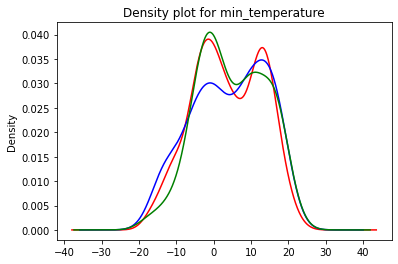

87


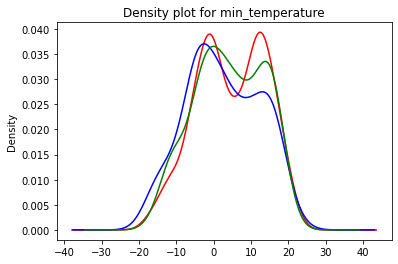

88


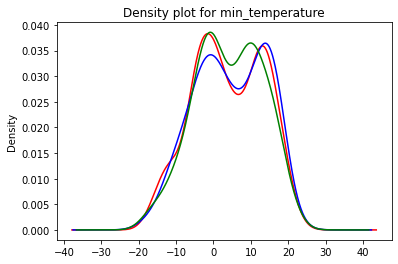

89


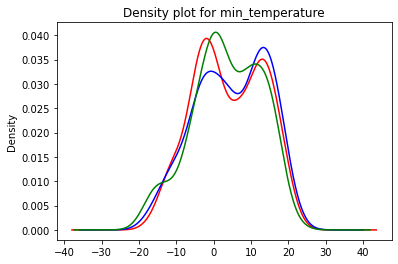

90


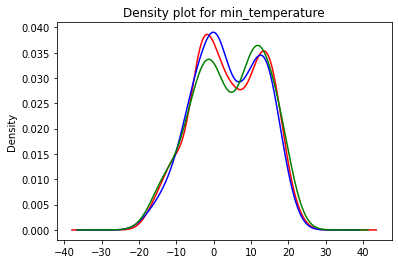

91


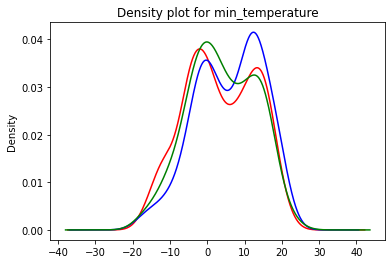

92


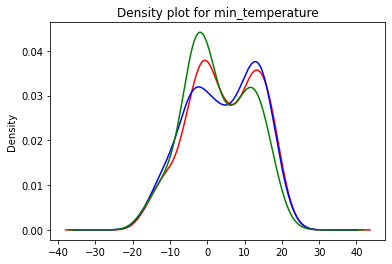

93


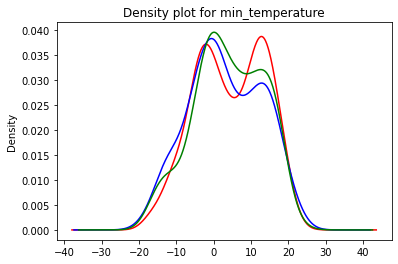

94


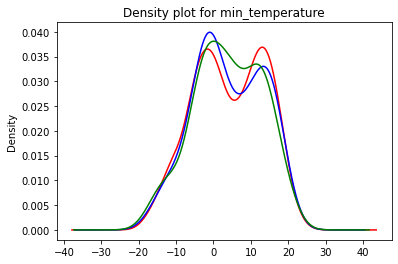

95


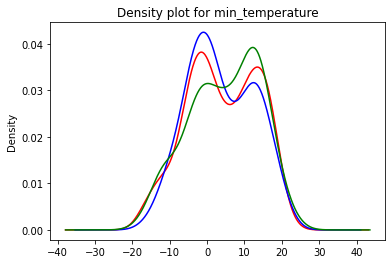

96


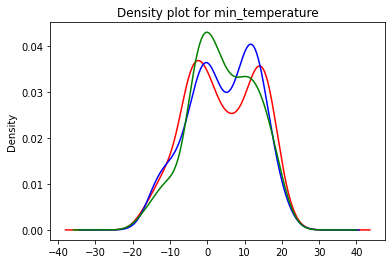

97


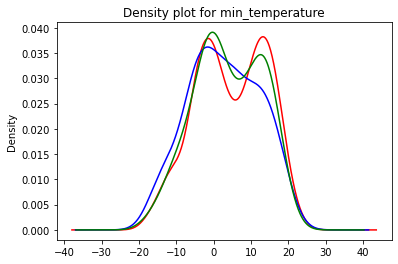

98


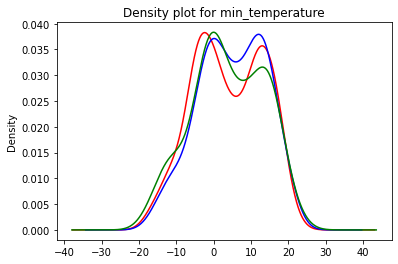

99


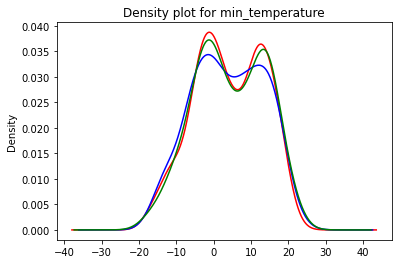

100


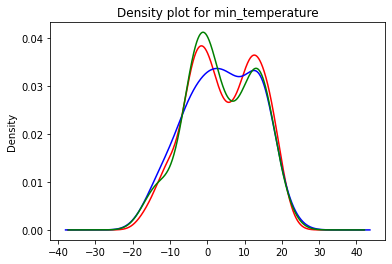

101


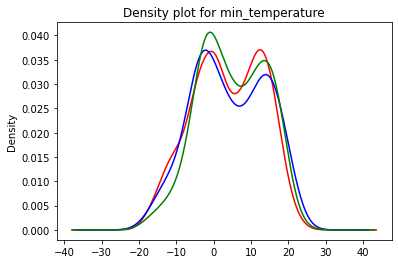

102


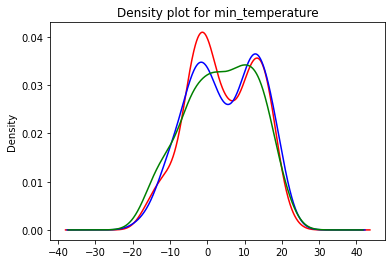

103


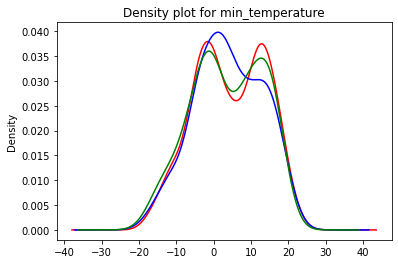

104


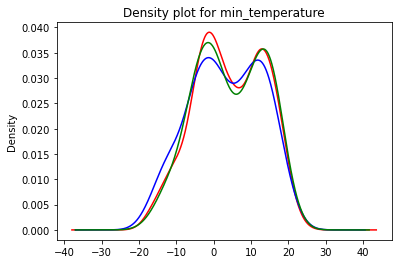

105


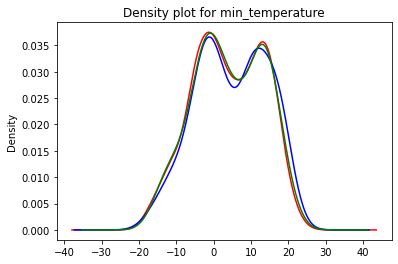

106


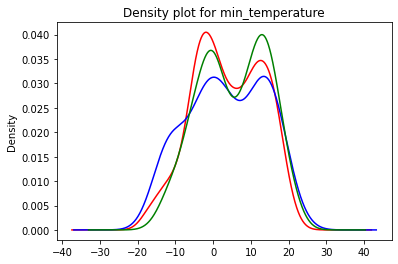

107


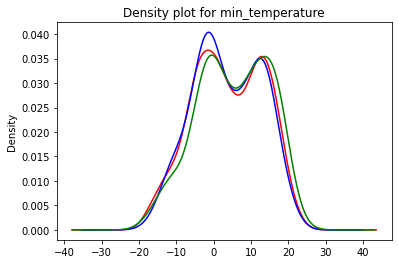

108


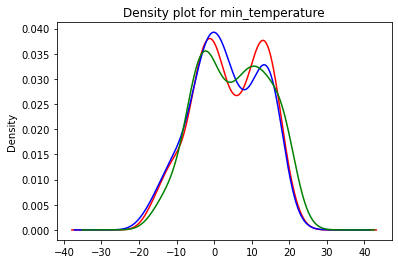

109


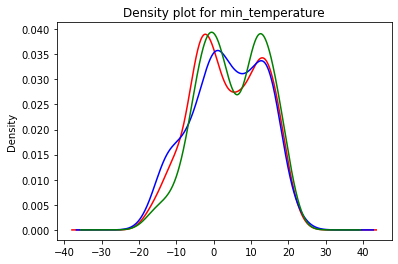

In [42]:
def train_val_test_split(X, y, train_size, val_size, test_size,i):
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = test_size, random_state=i)
    relative_train_size = train_size / (val_size + train_size)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                      train_size = relative_train_size, test_size = 1-relative_train_size, random_state=i)
    return X_train, X_val, X_test, y_train, y_val, y_test

for i in range(110):
    from sklearn.model_selection import train_test_split
    print(i)
    X = df_ml
    y = target
    X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, 0.6, 0.2, 0.2,i)
    X_train.min_temperature.plot.density(color='red')
    X_val.min_temperature.plot.density(color='blue')
    X_test.min_temperature.plot.density(color='green')
    plt.title('Density plot for min_temperature')
    plt.show()

In [43]:
def train_val_test_split(X, y, train_size, val_size, test_size):
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = test_size, random_state=105)
    relative_train_size = train_size / (val_size + train_size)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                      train_size = relative_train_size, test_size = 1-relative_train_size, random_state=105)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

X = df_ml
y = target
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, 0.6, 0.2, 0.2)

In [45]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(668, 80)
(224, 80)
(224, 80)


In [46]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(668, 1)
(224, 1)
(224, 1)


In [47]:
X_train

,Unnamed: 0,Total_price,Order_count,max_temperature,min_temperature,max_relative_humidity,avg_relative_humidity,max_dew_point,max_wind_speed,avg_wind_speed,min_wind_speed,max_pressure_sea,avg_pressure_sea,min_pressure_sea,avg_visibility,precipitation,max_cloud_cover,bombay aloo,onion bhaji,methi,crispy aloo,mango chutney,curry,garlic naan,Products2,korma,tandoori fish karahi,plain rice,pilau rice,bhuna,week,weekday,keema naan,chapati,vegetable samosa,grapes special,dhansak,mix starter,saag aloo,cauliflower bhajee,chicken tikka biryani,madras chicken,vegetable rice,chicken tikka,tandoori chicken,red sauce,mint sauce,mini bhaji,madras,day_of_month,sheek kehab,bhindi bhajee,naan,prawn puree,chicken tikka (main),plain papadum,butter chicken,spicy papadum,chicken tikka masala,lime pickle,lamb karahi,tandoori mixed grill,vegetable curry,puree,saag paneer,aloo gobi,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,subtraction_temperature,subtraction_relative_humidity,subtraction_dew_point,subtraction_wind_speed,subtraction_cloud_cover,day_off_temperature,day_off_precipitation,day_off_visibility
379,379,125.90,5,24.0,13.1,98,80.5,19.0,15,7.5,0.0,101.89,101.69,101.50,16100,0.0,8.0,2,1,0,0,1,1,1,0,0,0,0,3,0,29,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,17,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,10.9,35,3.4,15.0,8.0,0,0,0
1055,1055,1485.45,38,23.5,14.3,99,81.0,16.3,21,12.0,3.0,101.05,100.80,100.55,14050,11.0,8.0,11,9,0,0,11,0,8,1,0,0,9,27,0,21,7,5,13,1,0,0,1,3,1,0,2,1,5,1,3,4,4,0,1,0,1,15,2,2,50,2,2,8,0,2,6,2,0,1,2,0,0,0,0,0,0,9.2,36,3.1,18.0,3.0,1,0,1
1070,1070,1294.60,30,18.7,10.9,98,82.0,14.6,22,11.5,1.0,101.49,101.22,100.95,13450,0.3,8.0,14,9,0,0,7,0,12,0,0,0,8,28,0,24,1,2,3,1,0,0,3,5,2,1,3,3,1,0,2,6,5,0,16,0,1,14,4,4,24,2,1,2,1,1,2,0,0,2,3,1,0,0,0,0,0,7.8,32,4.6,21.0,7.0,1,1,1
36,36,140.75,5,28.3,10.8,95,65.0,14.7,14,8.0,2.0,102.08,101.96,101.84,24100,0.0,5.0,0,0,0,1,0,0,1,0,0,0,0,1,1,32,2,0,4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,8,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,17.5,60,4.9,12.0,5.0,0,0,0
510,510,1315.80,38,8.8,-0.3,92,72.5,5.2,29,19.0,9.0,101.64,100.83,100.01,15250,1.1,8.0,9,8,0,0,14,4,13,0,9,0,7,26,1,47,7,3,3,3,0,2,2,2,2,0,0,1,3,1,6,10,3,12,25,3,1,24,2,1,40,3,0,6,0,1,2,1,0,0,5,0,0,0,0,0,0,9.1,39,9.6,20.0,3.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,624,179.15,6,2.7,-5.9,68,53.0,-7.4,40,28.5,17.0,101.58,101.42,101.25,24100,0.0,6.0,0,1,0,1,0,1,1,0,0,0,0,3,0,11,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,20,1,0,0,1,0,0,0,2,1,0,0,0,1,0,0,0,0,0,1,0,0,0,8.6,30,5.7,23.0,6.0,0,0,0
7,7,814.90,19,27.1,11.0,91,63.0,13.4,25,13.0,1.0,101.77,101.67,101.57,24100,0.0,7.0,5,2,1,0,3,4,10,0,0,0,1,13,1,22,6,2,0,0,2,2,0,5,0,0,0,0,1,0,1,6,2,2,3,1,1,9,0,1,23,5,1,5,1,0,0,0,0,2,0,0,0,0,0,0,1,16.1,56,3.4,24.0,7.0,0,0,0
15,15,883.85,26,30.9,16.8,93,68.5,20.2,29,19.0,9.0,101.37,101.13,100.89,18500,0.0,8.0,5,4,3,0,7,2,8,1,0,0,2,18,0,23,7,5,7,1,2,4,0,3,0,1,0,1,3,0,1,0,1,5,11,2,3,7,2,0,23,1,1,8,0,1,1,2,0,0,1,0,0,0,0,0,0,14.1,49,12.5,20.0,6.0,0,1,1
436,436,213.35,8,24.9,6.5,98,69.5,14.1,10,5.5,1.0,102.07,101.68,101.29,24100,0.0,7.0,2,1,2,0,0,1,5,0,2,0,2,4,0,37,3,0,1,0,0,0,1,0,0,0,0,0,1,0,0,2,0,1,12,0,0,3,0,0,7,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18.4,57,7.9,9.0,7.0,0,0,0


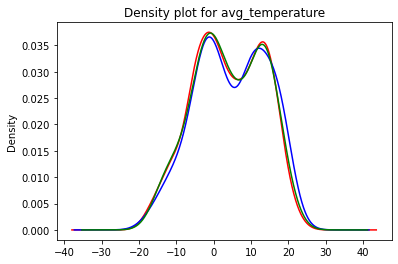

In [48]:
X_train.min_temperature.plot.density(color='red')
X_val.min_temperature.plot.density(color='blue')
X_test.min_temperature.plot.density(color='green')
plt.title('Density plot for avg_temperature')
plt.show()

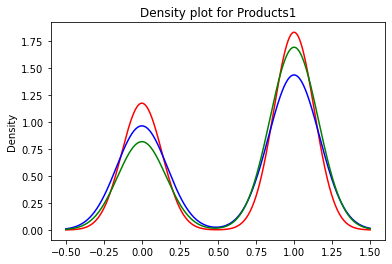

In [49]:
y_train.Products1.plot.density(color='red')
y_val.Products1.plot.density(color='blue')
y_test.Products1.plot.density(color='green')
plt.title('Density plot for Products1')
plt.show()

# Supervised Models

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Lasso
import sklearn.metrics as metrics 

In [51]:
def classificationMetrics(y, yhat):
    prf1 = metrics.precision_recall_fscore_support(y,yhat)
    res = {'Accuracy': metrics.accuracy_score(y,yhat),
           'Precision':prf1[0][1],
           'Recall': prf1[1][1],
           'f1-score': prf1[2][1],
           'Log-loss': metrics.log_loss(y,yhat),
           'AUC': metrics.roc_auc_score(y,yhat)
          }
    return res

In [52]:
models_list_train = pd.DataFrame()
models_list_val = pd.DataFrame()

### Logistic Regression

In [53]:
mod1 = LogisticRegression()
mod1.fit(X_train,y_train)

pred_train = mod1.predict(X_train)
pred_val = mod1.predict(X_val)

C:\Users\nadav.marciano\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nadav.marciano\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
model_dict = {'model': "Logistic Regression"}
models_list_train = models_list_train.append({**model_dict, **classificationMetrics(y_train, pred_train)}, ignore_index=True)
models_list_val = models_list_val.append({**model_dict, **classificationMetrics(y_val, pred_val)}, ignore_index=True)

### Decision Tree

In [55]:
mod2 = DecisionTreeClassifier()
mod2.fit(X_train,y_train)

pred_train = mod2.predict(X_train)
pred_val = mod2.predict(X_val)

In [56]:
model_dict = {'model': "Decision Tree"}
models_list_train = models_list_train.append({**model_dict, **classificationMetrics(y_train, pred_train)}, ignore_index=True)
models_list_val = models_list_val.append({**model_dict, **classificationMetrics(y_val, pred_val)}, ignore_index=True)

### Random Forest

In [57]:
mod3 = RandomForestClassifier()
mod3.fit(X_train,y_train)

pred_train = mod3.predict(X_train)
pred_val = mod3.predict(X_val)

<ipython-input-57-d4536070d02f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mod3.fit(X_train,y_train)


In [58]:
model_dict = {'model': "RandomForest"}
models_list_train = models_list_train.append({**model_dict, **classificationMetrics(y_train, pred_train)}, ignore_index=True)
models_list_val = models_list_val.append({**model_dict, **classificationMetrics(y_val, pred_val)}, ignore_index=True)

### Adaptive Boosting (ADABoost)

In [59]:
mod4 = AdaBoostClassifier()
mod4.fit(X_train,y_train)

pred_train = mod4.predict(X_train)
pred_val = mod4.predict(X_val)

C:\Users\nadav.marciano\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [60]:
model_dict = {'model': "ADABoost"}
models_list_train = models_list_train.append({**model_dict, **classificationMetrics(y_train, pred_train)}, ignore_index=True)
models_list_val = models_list_val.append({**model_dict, **classificationMetrics(y_val, pred_val)}, ignore_index=True)

### Gradient Boosting Machine (GBM)

In [61]:
mod5 = GradientBoostingClassifier()
mod5.fit(X_train,y_train)

pred_train = mod5.predict(X_train)
pred_val = mod5.predict(X_val)

C:\Users\nadav.marciano\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [62]:
model_dict = {'model': "GBM"}
models_list_train = models_list_train.append({**model_dict, **classificationMetrics(y_train, pred_train)}, ignore_index=True)
models_list_val = models_list_val.append({**model_dict, **classificationMetrics(y_val, pred_val)}, ignore_index=True)

### Support Vector Machine (SVM)

In [63]:
mod6 = LinearSVC()
mod6.fit(X_train,y_train)

pred_train = mod6.predict(X_train)
pred_val = mod6.predict(X_val)

C:\Users\nadav.marciano\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nadav.marciano\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [64]:
model_dict = {'model': "SVM"}
models_list_train = models_list_train.append({**model_dict, **classificationMetrics(y_train, pred_train)}, ignore_index=True)
models_list_val = models_list_val.append({**model_dict, **classificationMetrics(y_val, pred_val)}, ignore_index=True)

C:\Users\nadav.marciano\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nadav.marciano\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Result of train prediction

In [65]:
models_list_train.sort_values('AUC',ascending=False)

,AUC,Accuracy,Log-loss,Precision,Recall,f1-score,model
1,1.000000,1.000000,9.992007e-16,1.000000,1.000000,1.000000,Decision Tree
2,1.000000,1.000000,9.992007e-16,1.000000,1.000000,1.000000,RandomForest
4,0.927683,0.931138,2.378446e+00,0.943489,0.943489,0.943489,GBM
3,0.866715,0.872754,4.394954e+00,0.896552,0.894349,0.895449,ADABoost
0,0.645763,0.693114,1.059965e+01,0.702000,0.862408,0.773980,Logistic Regression
5,0.500000,0.609281,1.349525e+01,0.609281,1.000000,0.757209,SVM


### Result of val prediction

In [66]:
models_list_val.sort_values('AUC',ascending=False)

,AUC,Accuracy,Log-loss,Precision,Recall,f1-score,model
2,0.724876,0.723214,9.559926,0.800000,0.716418,0.755906,RandomForest
4,0.693367,0.696429,10.485089,0.766129,0.708955,0.736434,GBM
3,0.641376,0.647321,12.181211,0.720000,0.671642,0.694981,ADABoost
1,0.624793,0.638393,12.489611,0.699248,0.694030,0.696629,Decision Tree
0,0.606716,0.647321,12.181279,0.668712,0.813433,0.734007,Logistic Regression
5,0.500000,0.598214,13.877508,0.598214,1.000000,0.748603,SVM


I chose the GBM model according to the two tables

# Hyperparameter Fine Tuning

We will apply cross-validation on the training dataset
 
 
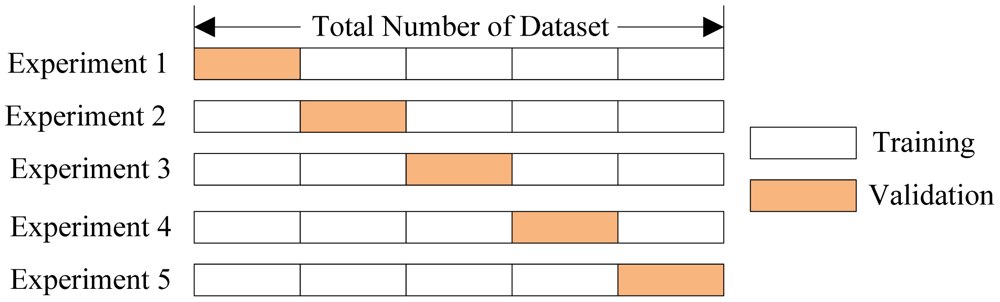


Additionaly, we will use grid search for the fine-tunning of the models. 

### Gradient Boosting Machine

In [118]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt' , 'log']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3, 5, 10]
# The fraction of observations to be selected for each tree. Selection is done by random sampling.
subsample = [0.5, 0.8, 0.9, 1.0]
# This determines the impact of each tree on the final outcome
learning_rate = [0.2, 0.5, 0.8]

In [119]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'subsample': subsample,
               'learning_rate': learning_rate}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 3, 5, 10], 'min_samples_leaf': [2, 3, 5, 10], 'subsample': [0.5, 0.8, 0.9, 1.0], 'learning_rate': [0.2, 0.5, 0.8]}


In [120]:
rf = GradientBoostingClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, 
                               verbose=2, random_state=18, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  9.1min finished
C:\Users\nadav.marciano\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.2, 0.5, 0.8],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 'log'],
                                        'min_samples_leaf': [2, 3, 5, 10],
                                        'min_samples_split': [2, 3, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000],
                                        'subsample': [0.5, 0.8, 0.9, 1.0]},
                   random_state=18, verbose=2)

In [121]:
rf_random.best_params_

{'subsample': 1.0,
 'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'learning_rate': 0.2}

In [122]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = metrics.roc_auc_score(test_labels,predictions)
    AUC = 100 * errors
    print('Model Performance')
    print('AUC: {:0.4f}'.format(errors))
    return AUC

#### Run base model

In [123]:
base_model = GradientBoostingClassifier()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_val, y_val)

C:\Users\nadav.marciano\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model Performance
AUC: 0.6840


#### Compare fine-tunned model

In [124]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_val, y_val)

Model Performance
AUC: 0.7026


In [125]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 2.72%.


## Grid search: we decide which parameters and how (not randomly)

In [126]:
rf_random.best_params_

{'subsample': 1.0,
 'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'learning_rate': 0.2}

In [146]:
# Create the parameter grid 
param_grid = {
    'subsample': [0.95, 1, 1.2],
    'n_estimators': [180, 200, 220],
    'max_features': ['auto'],
    'min_samples_leaf': [2],
    'min_samples_split': [2],
    'learning_rate': [0.2, 0.25, 0.3, 0.35, 0.4],
    'max_depth': [60, 65,70,75]
}

# Create a based model
rf = GradientBoostingClassifier()
# Instantiate the grid search model

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [147]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  6.3min finished
C:\Users\nadav.marciano\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.25, 0.3, 0.35, 0.4],
                         'max_depth': [60, 65, 70, 75],
                         'max_features': ['auto'], 'min_samples_leaf': [2],
                         'min_samples_split': [2],
                         'n_estimators': [180, 200, 220],
                         'subsample': [0.95, 1, 1.2]},
             verbose=2)

In [148]:
grid_search.best_params_

{'learning_rate': 0.3,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200,
 'subsample': 1}

In [149]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_val, y_val)

Model Performance
AUC: 0.7357


In [150]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 7.55%.


### I choes the grid model

In [152]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
AUC: 0.7428
